# Example use cases

Start by importing the necessary libraries.

In [11]:
import warnings

import hypernetx as hnx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from brec_analysis.analyse_brec_categories import analyze_brec_categories
from brec_analysis.compare_encodings_wrapper import compare_encodings_wrapper
from brec_analysis.plotting_graphs_and_hgraphs_for_brec import (
    plot_graph_pair, plot_hypergraph_pair)
from brec_analysis.utils_for_brec import (convert_nx_to_hypergraph_dict,
                                          nx_to_pyg)
from encodings_hnns.curvatures_frc import FormanRicci
from encodings_hnns.encodings import HypergraphEncodings
from encodings_hnns.expansions import plot_hypergraph_and_expansion
from encodings_hnns.laplacians import Laplacians
from encodings_hnns.liftings_and_expansions import lift_to_hypergraph

warnings.filterwarnings('ignore')

Here is the function that plots the hypergraph.

In [12]:
def plot_hypergraph(hg):
    # Create HyperNetX hypergraph object
    H = hnx.Hypergraph(hg["hypergraph"])

    # Plot settings
    plt.figure(figsize=(10, 8))

    # Plot the hypergraph
    hnx.draw(H,
        with_node_labels=True,
        with_edge_labels=True,
        convex=True  # Using non-convex drawing
    )

    plt.title("Toy Hypergraph Example")
    plt.show()

## A- Encoding interface

Here we show how to use the encoding interface. We add random walks encodings.

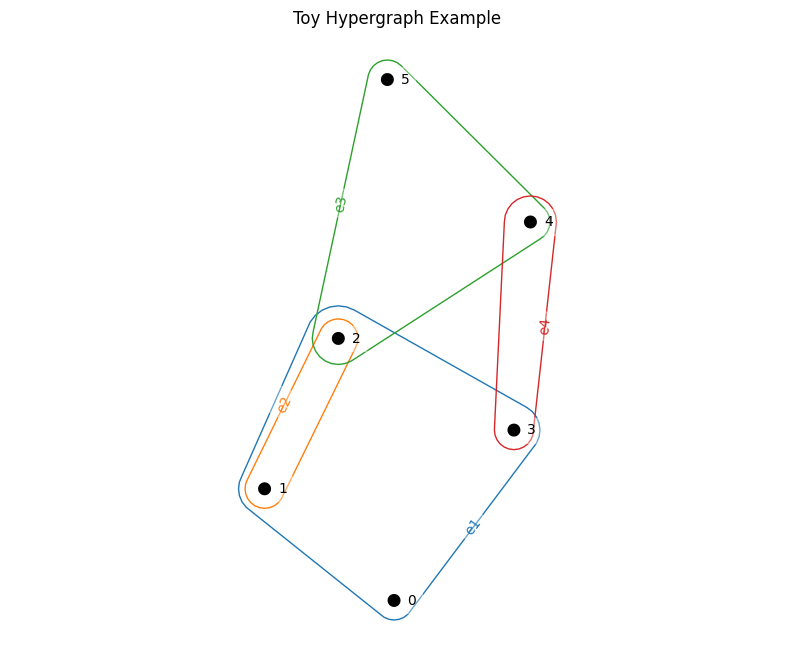

We have added the features: 
 [[1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
  0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
  0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
  0.09092645 0.0908977  0.09091657]
 [1.         0.         0.37962963 0.09259259 0.24879973 0.14366141
  0.20723705 0.16623099 0.19185113 0.17551149 0.18584563 0.17926119
  0.18345126 0.18077571 0.18248561 0.18139043 0.18209288 0.18164153
  0.18193197 0.18174478 0.18186561]
 [1.         0.         0.47685185 0.1558642  0.34859396 0.22638746
  0.3020623  0.25446769 0.28423023 0.26550903 0.27727908 0.2698567
  0.27454259 0.2715778  0.27345666 0.27226368 0.27302248 0.27253896
  0.27284761 0.27265024 0.27277666]
 [1.         0.         0.35185185 0.08333333 0.24905693 0.13890318
  0.21018534 0.16337279 0.19393106 0.17389623 0.18701577 0.17841055
  0.18405514 0.1803495  0.18278312 0.18118399 0.18223519 0.18154388
  0.18199869 0.18169936 0.18189642]
 [1.       

In [13]:
# Example hypergraph
hg: dict[str, dict | int] = {
    "hypergraph": {
        "e1": [0, 1, 2, 3],
        "e2": [1, 2],
        "e3": [2, 4, 5],
        "e4": [3, 4],
    },
    "features": np.array([[1], [1], [1], [1], [1], [1]]),
    "labels": {},
    "n": 6,
}
plot_hypergraph(hg)
# Instantiates class that computes the encodings
hgencodings = HypergraphEncodings()
# Add random walks encodings
hg = hgencodings.add_randowm_walks_encodings(hg, verbose=False)
# k is 20 so the features are shape n by 21
assert isinstance(hg["features"], np.ndarray)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 21, f"The shape is {hg['features'].shape[1]}"

print(f"We have added the features: \n {hg['features']}")

Let us add degree encodings and Laplacian encodings.

In [14]:
# Add degree encodings
hg = hgencodings.add_degree_encodings(hg, verbose=True)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 27, f"The shape is {hg['features'].shape[1]}"
# Add Laplacian encodings
hg = hgencodings.add_laplacian_encodings(hg, verbose=True)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 33, f"The shape is {hg['features'].shape[1]}"

The hypergraph features for node 0, are 
 [1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
 0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
 0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
 0.09092645 0.0908977  0.09091657]
We add the degree encoding:
 [[1.         2.         3.         2.         2.33333333 0.47140452]]
The stacked features are 
 [[1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
  0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
  0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
  0.09092645 0.0908977  0.09091657 1.         2.         3.
  2.         2.33333333 0.47140452]]
The hypergraph features for node 1, are 
 [1.         0.         0.37962963 0.09259259 0.24879973 0.14366141
 0.20723705 0.16623099 0.19185113 0.17551149 0.18584563 0.17926119
 0.18345126 0.18077571 0.18248561 0.18139043 0.18209288 0.18164153
 0.18193197 0.18174478 0.18186561]
We add the degree

### A-1 Lower level: Laplacian 

The module laplacians contains the class Laplacians that computes the node neighbors, node degrees, random walk Laplacian and normalized random walk Laplacian.

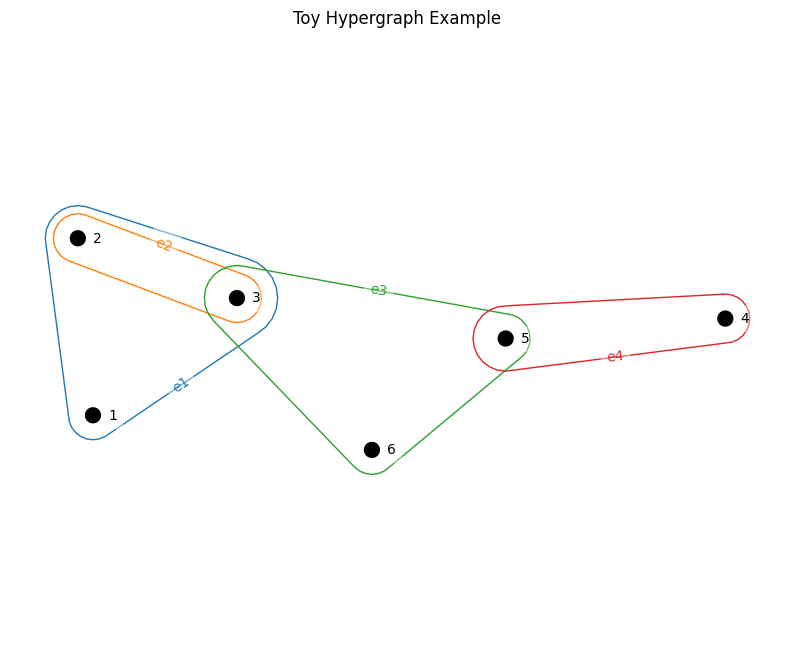

node_neighbors: 
 OrderedDict([(1, {2, 3}), (2, {1, 3}), (3, {1, 2, 5, 6}), (4, {5}), (5, {3, 4, 6}), (6, {3, 5})])
node_degrees: 
 OrderedDict([(1, 1), (2, 2), (3, 3), (4, 1), (5, 2), (6, 1)])
The nodes are [1, 2, 3, 4, 5, 6]
The nodes are [1, 2, 3, 4, 5, 6]
rw_laplacian: 
 [[ 1.         -0.5        -0.5         0.          0.          0.        ]
 [-0.5         1.         -0.5         0.          0.          0.        ]
 [-0.25       -0.25        1.          0.         -0.25       -0.25      ]
 [ 0.          0.          0.          1.         -1.          0.        ]
 [ 0.          0.         -0.33333333 -0.33333333  1.         -0.33333333]
 [ 0.          0.         -0.5         0.         -0.5         1.        ]]


In [15]:
hg: dict[str, dict | int] = {
    "hypergraph": {
        "e1": [1, 2, 3],
        "e2": [2, 3],
        "e3": [3, 5, 6],
        "e4": [4, 5],
    },
    "features": {},
    "labels": {},
    "n": 6,
}

plot_hypergraph(hg)
# Instantiates the Laplacians class
laplacian = Laplacians(hg)
laplacian.compute_node_neighbors()
print(f"node_neighbors: \n {laplacian.node_neighbors}")
laplacian.compute_node_degrees()
print(f"node_degrees: \n {laplacian.node_degrees}")
laplacian.compute_random_walk_laplacian(rw_type="WE")
laplacian.compute_normalized_laplacian()
laplacian.compute_random_walk_laplacian()
print(f"rw_laplacian: \n {laplacian.rw_laplacian}")

### A-2 Lower level: Curvatures

The module curvatures_frc contains the class FormanRicci that computes the Forman-Ricci curvature.

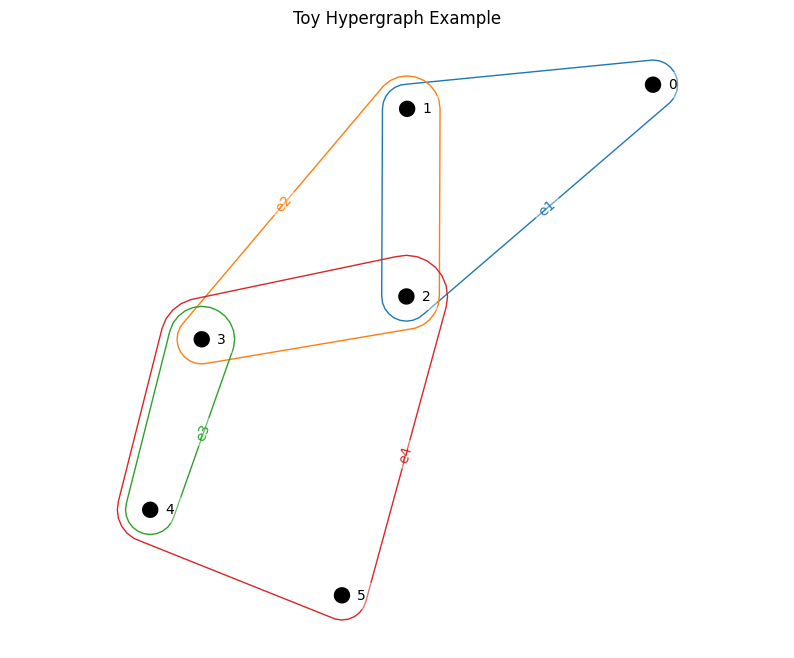


Node Degrees:
{0: 1, 1: 2, 2: 3, 3: 3, 4: 2, 5: 1}

Forman-Ricci Curvature:
{'e1': 0, 'e2': -2, 'e3': -1, 'e4': -1}


In [16]:
# Create a toy hypergraph
toy_data = {
    "hypergraph": {
        "e1": [0, 1, 2],      # A triangle
        "e2": [1, 2, 3],      # Another triangle sharing two nodes
        "e3": [3, 4],         # An edge
        "e4": [2, 3, 4, 5],   # A 4-node hyperedge
    },
    "features": np.array([[1.0] for _ in range(6)]),  # Simple features
    "labels": {},  # Empty labels
    "n": 6        # Number of nodes
}

plot_hypergraph(toy_data)

# Initialize FormanRicci class
forman_ricci = FormanRicci(toy_data)

# Compute the Forman-Ricci curvature
forman_ricci.compute_forman_ricci()

# Print results
print("\nNode Degrees:")
print(forman_ricci.node_degrees)
# Expected output: node degrees show how many hyperedges each node belongs to
# e.g., node 2 appears in three hyperedges (e1, e2, e4)

print("\nForman-Ricci Curvature:")
print(forman_ricci.forman_ricci)
# Expected output: curvature for each hyperedge
# Formula: F(e) = 2|e| - D, where |e| is hyperedge size and D is sum of node degrees

Let us compute the Forman-Ricci curvature for the Rook and Shrikhande graphs.

Rook Graph:
Node Degrees: {0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 12: 6, 13: 6, 11: 6, 14: 6, 15: 6}
Forman-Ricci Curvature: {'e_0': -8, 'e_1': -8, 'e_2': -8, 'e_3': -8, 'e_4': -8, 'e_5': -8, 'e_6': -8, 'e_7': -8, 'e_8': -8, 'e_9': -8, 'e_10': -8, 'e_11': -8, 'e_12': -8, 'e_13': -8, 'e_14': -8, 'e_15': -8, 'e_16': -8, 'e_17': -8, 'e_18': -8, 'e_19': -8, 'e_20': -8, 'e_21': -8, 'e_22': -8, 'e_23': -8, 'e_24': -8, 'e_25': -8, 'e_26': -8, 'e_27': -8, 'e_28': -8, 'e_29': -8, 'e_30': -8, 'e_31': -8, 'e_32': -8, 'e_33': -8, 'e_34': -8, 'e_35': -8, 'e_36': -8, 'e_37': -8, 'e_38': -8, 'e_39': -8, 'e_40': -8, 'e_41': -8, 'e_42': -8, 'e_43': -8, 'e_44': -8, 'e_45': -8, 'e_46': -8, 'e_47': -8}

Shrikhande Graph:
Node Degrees: {0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 12: 6, 14: 6, 13: 6, 15: 6, 10: 6, 11: 6}
Forman-Ricci Curvature: {'e_0': -8, 'e_1': -8, 'e_2': -8, 'e_3': -8, 'e_4': -8, 'e_5': -8, 'e_6': -8, 'e_7': -8, 'e_8': -8, 'e_9': -8, 'e_10': -

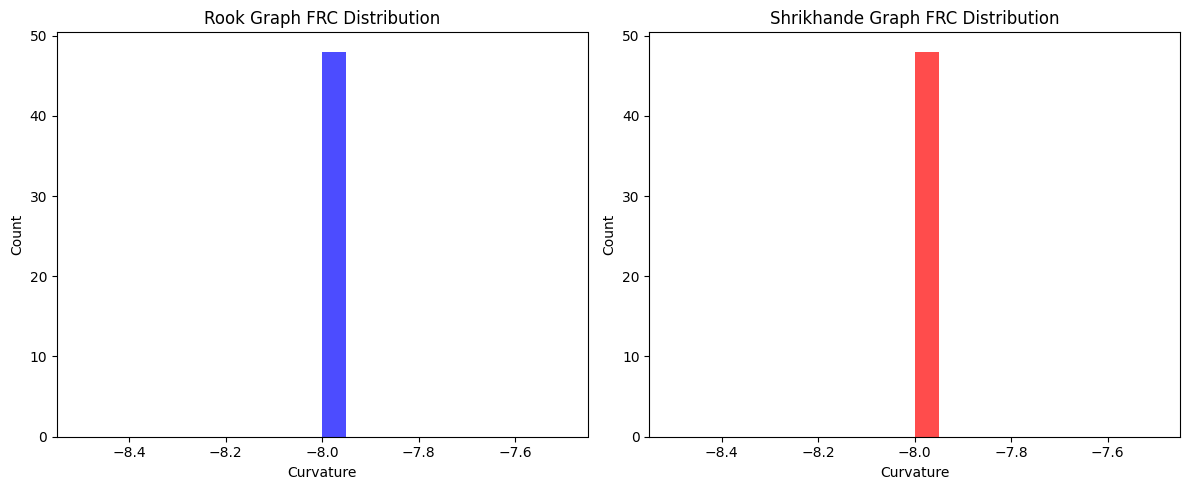

In [17]:
# Load the Rook and Shrikhande graphs
rook = nx.read_graph6("../data/Rook_Shrikhande/rook_graph.g6")
shrikhande = nx.read_graph6("../data/Rook_Shrikhande/shrikhande.g6")

# Convert to hypergraph format
hg_rook = convert_nx_to_hypergraph_dict(rook)
hg_shrikhande = convert_nx_to_hypergraph_dict(shrikhande)

# Initialize FormanRicci for both graphs
frc_rook = FormanRicci(hg_rook)
frc_shrikhande = FormanRicci(hg_shrikhande)

# Compute Forman-Ricci curvature
frc_rook.compute_forman_ricci()
frc_shrikhande.compute_forman_ricci()

# Print results
print("Rook Graph:")
print("Node Degrees:", frc_rook.node_degrees)
print("Forman-Ricci Curvature:", frc_rook.forman_ricci)

print("\nShrikhande Graph:")
print("Node Degrees:", frc_shrikhande.node_degrees)
print("Forman-Ricci Curvature:", frc_shrikhande.forman_ricci)

# Plot curvature distributions
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(list(frc_rook.forman_ricci.values()), bins=20, alpha=0.7, color='blue', label='Rook')
plt.title('Rook Graph FRC Distribution')
plt.xlabel('Curvature')
plt.ylabel('Count')

plt.subplot(122)
plt.hist(list(frc_shrikhande.forman_ricci.values()), bins=20, alpha=0.7, color='red', label='Shrikhande')
plt.title('Shrikhande Graph FRC Distribution')
plt.xlabel('Curvature')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## B- Expansions and liftings

### B-1 Expansions


Here we provide an example of the clique expansion of a hypergraph.

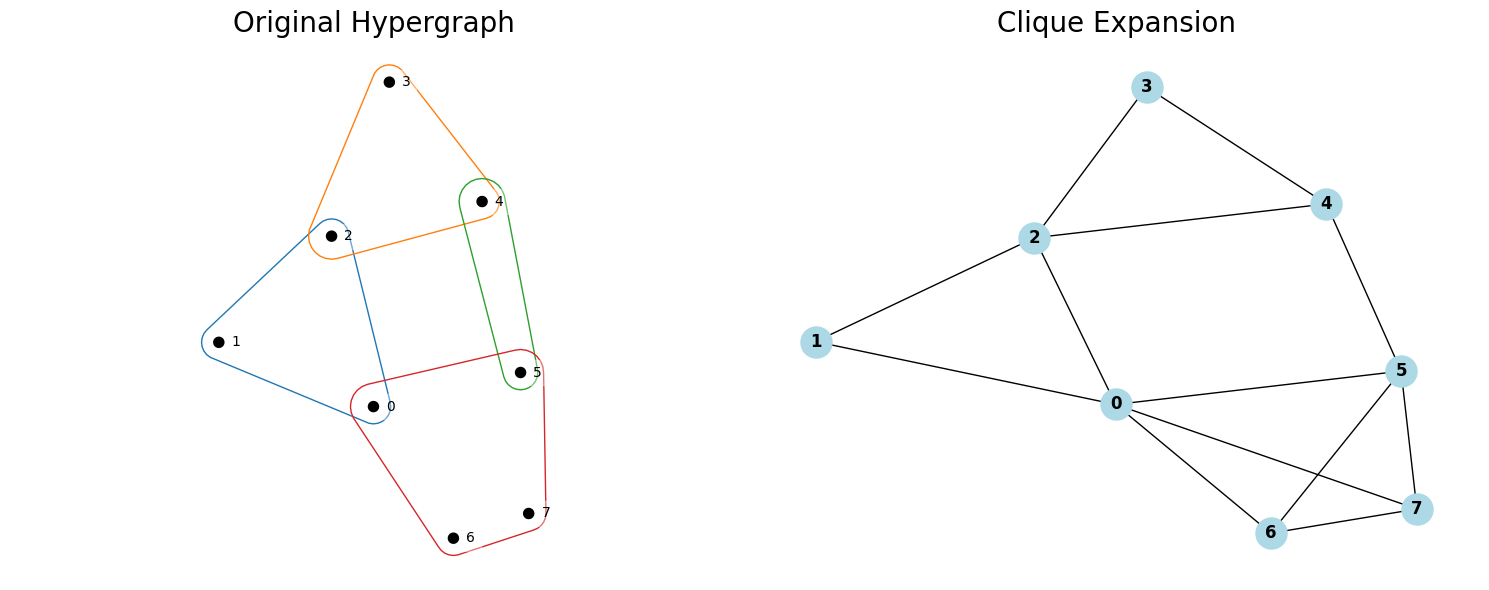

In [18]:
hypergraph = {
    "e1": [0, 1, 2],  # A 3-node hyperedge
    "e2": [2, 3, 4],  # Another 3-node hyperedge
    "e3": [4, 5],  # A 2-node hyperedge
    "e4": [0, 5, 6, 7],  # A 4-node hyperedge
}

# Create dataset dictionary in the required format
dataset = {
    "hypergraph": hypergraph,
    "n": 8,  # Number of nodes (0-7)
    "features": [[1.0] for _ in range(8)],  # Simple 1D features
    "labels": np.array(
        [[1] if i % 2 == 0 else [0] for i in range(8)]
    ),  # Binary labels as arrays
}

# Plot the hypergraph and its expansion
%matplotlib inline
plot_hypergraph_and_expansion(dataset=dataset)

### B-2 Lifting


Here we provide an example of graph lifting to hypergraphs using Rook and Shrikhande graphs. The 
plots are realized using the HyperNetX library.

Analyzing Rook vs Shrikhande


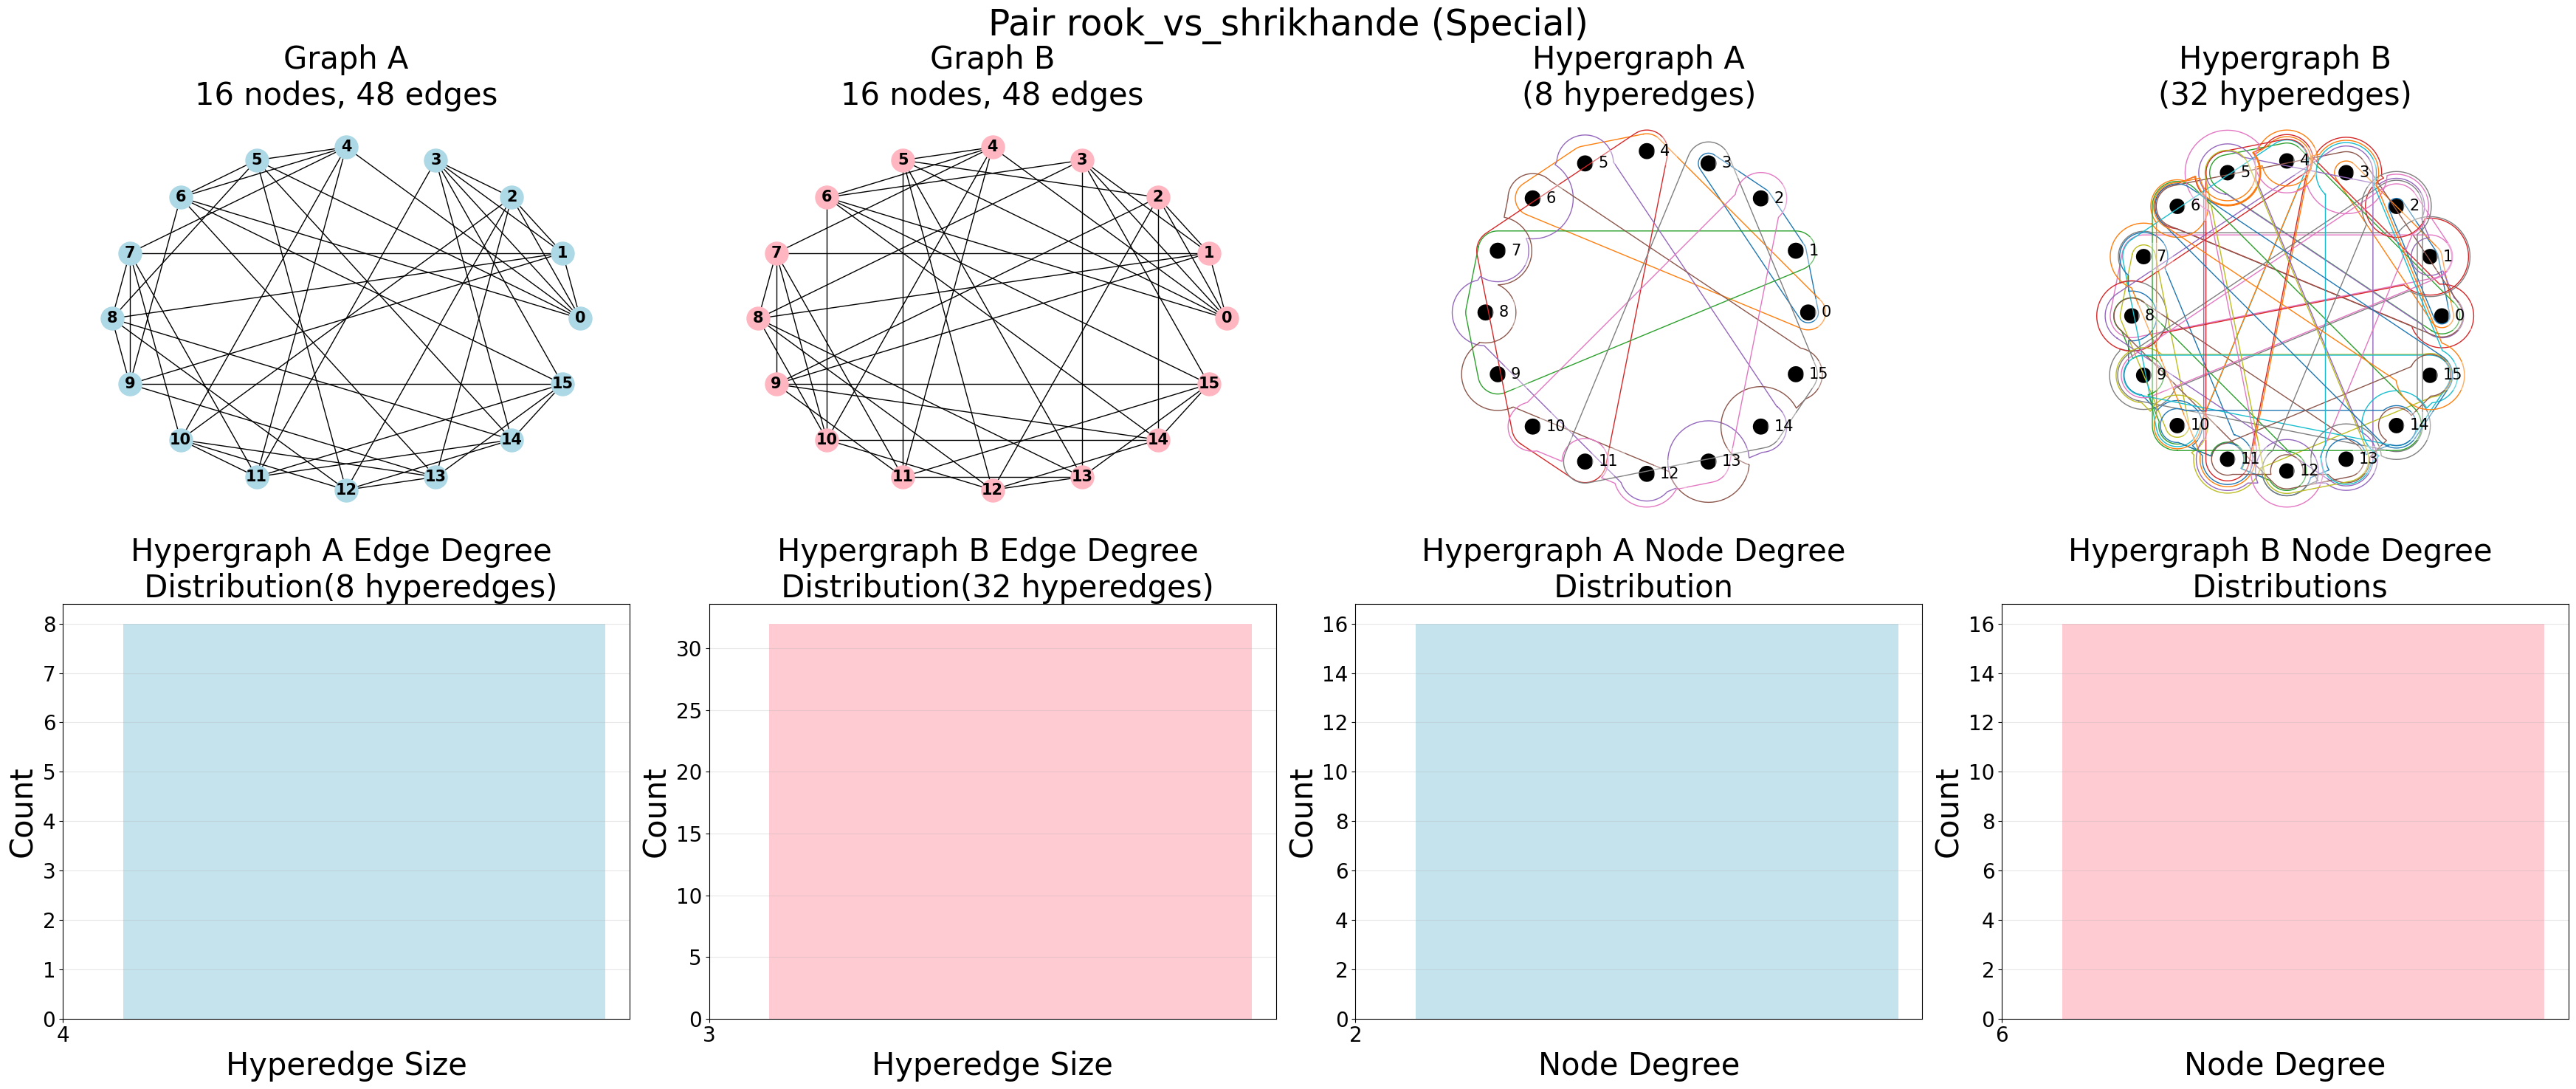

<Figure size 1500x800 with 0 Axes>

In [19]:
# Load the graphs
rook = nx.read_graph6("../data/Rook_Shrikhande/rook_graph.g6")
shrikhande = nx.read_graph6("../data/Rook_Shrikhande/shrikhande.g6")

rook_data = nx_to_pyg(rook)
shrikhande_data = nx_to_pyg(shrikhande)

# Analyze as a special pair
print("Analyzing Rook vs Shrikhande")

# Load the Rook and Shrikhande graphs
G1, G2 = rook, shrikhande

# Lift to hypergraphs
hg1_lifted = lift_to_hypergraph(G1, verbose=False, already_in_nx=True)
hg2_lifted = lift_to_hypergraph(G2, verbose=False, already_in_nx=True)

# Import matplotlib for inline plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the lifted hypergraphs
plot_hypergraph_pair(
    G1, G2, hg1_lifted, hg2_lifted, 
    "rook_vs_shrikhande", "Special", 
    display=True,
)

# If needed, you can also adjust the figure size
plt.figure(figsize=(15, 8))
plt.show()

## C- Brec



Loading data from: ../data/BREC_Data

BREC Dataset Structure:
basic: 56 pairs (112 graphs)
Total cumulative: 56 pairs (112 graphs)
  First graph: 10 nodes, 26 edges
Total connected graphs loaded for regular: 100
regular: 50 pairs (100 graphs)
Total cumulative: 106 pairs (212 graphs)
  First graph: 10 nodes, 20 edges
str: 50 pairs (100 graphs)
Total cumulative: 156 pairs (312 graphs)
  First graph: 16 nodes, 48 edges
Total connected graphs loaded for cfi: 194
cfi: 97 pairs (194 graphs)
Total cumulative: 253 pairs (506 graphs)
  First graph: 74 nodes, 148 edges
Total connected graphs loaded for extension: 194
extension: 97 pairs (194 graphs)
Total cumulative: 350 pairs (700 graphs)
  First graph: 10 nodes, 31 edges
4vtx: 20 pairs (40 graphs)
Total cumulative: 370 pairs (740 graphs)
  First graph: 63 nodes, 945 edges
dr: 20 pairs (40 graphs)
Total cumulative: 390 pairs (780 graphs)
  First graph: 63 nodes, 189 edges

Total: 390 pairs (780 graphs)


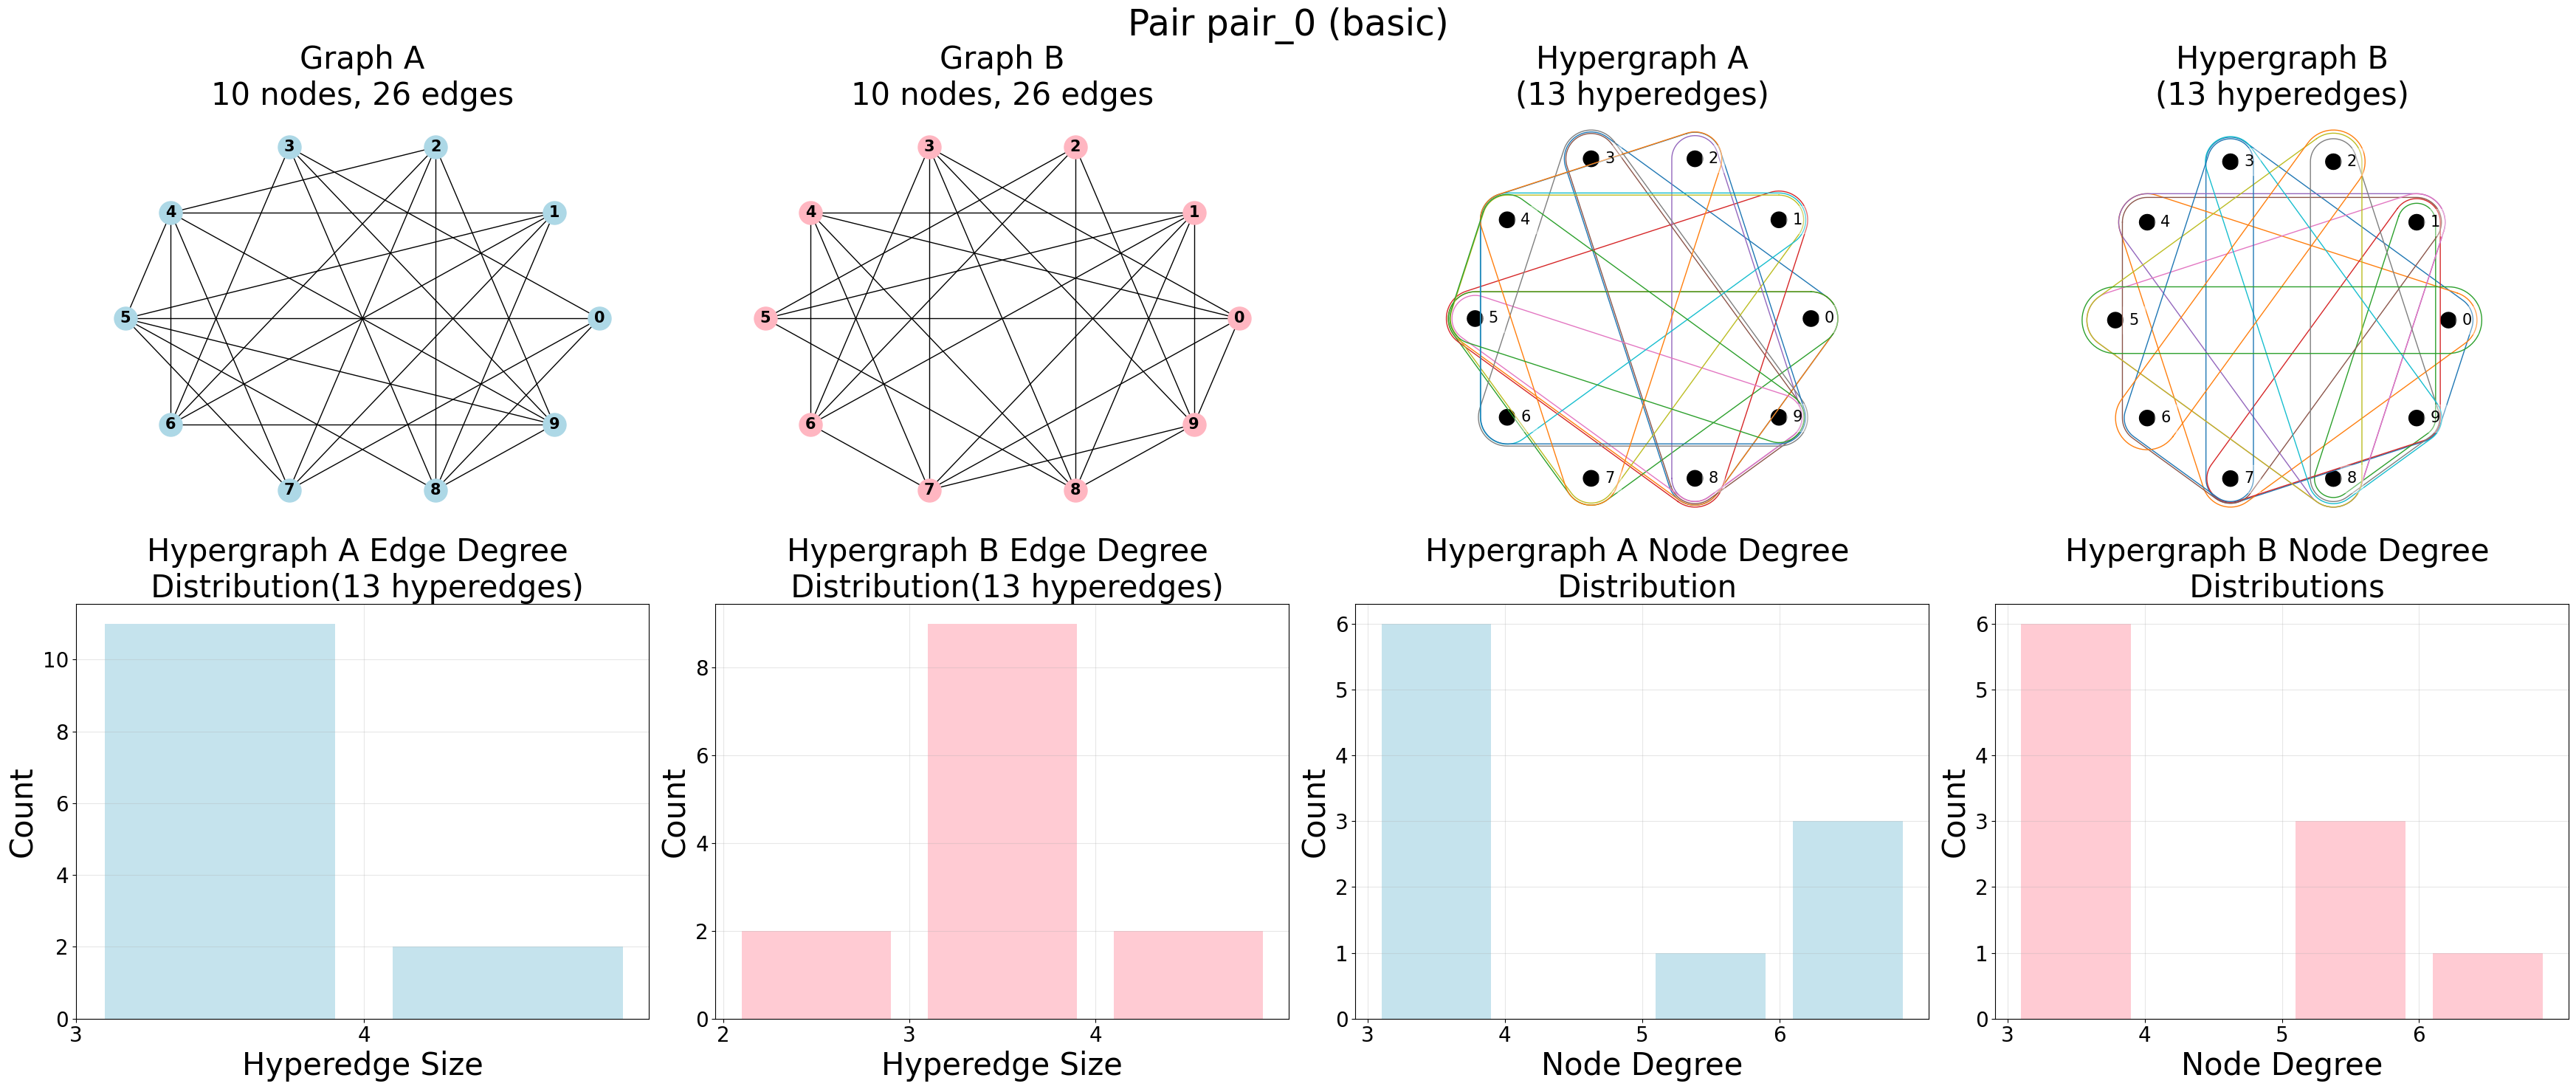

Modified name: LDP
hg1_encodings: 
 (10, 6)
hg2_encodings: 
 (10, 6)
Encoding name: LDP

✅ Found matching permutation for LDP!
Permutation: (6, 5, 0, 1, 2, 3, 7, 4, 8, 9)
Statistics after permutation:
Max difference: 0.0
Modified name: LCP-FRC
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
Handling different dimensions.
hg1_encodings: 
 (10, 5)
hg2_encodings: 
 (10, 5)
Encoding name: LCP-FRC

✅ Found matching permutation for LCP-FRC!
Permutation: (6, 5, 

In [20]:
# Load BREC graphs
graphs_by_category = analyze_brec_categories(data_path="../data/BREC_Data")

# Select a specific pair (e.g., first pair from 'cfi' category)
category = 'basic'
graphs = graphs_by_category[category]
g1, g2 = graphs[0], graphs[1]  # First pair

# Convert to hypergraph format and lift them
hg1 = convert_nx_to_hypergraph_dict(g1)
hg2 = convert_nx_to_hypergraph_dict(g2)
hg1_lifted = lift_to_hypergraph(g1, verbose=False, already_in_nx=True)
hg2_lifted = lift_to_hypergraph(g2, verbose=False, already_in_nx=True)

# Plot the lifted hypergraphs
plot_hypergraph_pair(
    g1, g2, hg1_lifted, hg2_lifted,
    "pair_0", category, display=True
)

# Compare encodings
results = compare_encodings_wrapper(
    hg1, hg2,
    "pair_0",
    category,
    is_isomorphic=False,
    level="graph",
    node_mapping=None
)

# Print results
for encoding, result in results["encodings"].items():
    print(f"\n{encoding}:")
    print(f"Status: {result['status']}")
    if result['scaling_factor'] is not None:
        print(f"Scaling factor: {result['scaling_factor']:.4f}")